In [17]:
# import 
import numpy as np
import pandas as pd
import tensorflow as tf
import csv
import matplotlib.pyplot as plt
from scipy import signal
import seaborn as sns
import sklearn
import impyute

In [18]:
# reading train data
data = pd.read_csv('credit_card_default_train.csv') 
print(data.head())

  Client_ID Balance_Limit_V1 Gender EDUCATION_STATUS MARITAL_STATUS  \
0        A2               1M      M         Graduate          Other   
1        A3               1M      F      High School          Other   
2        A4             100K      F      High School         Single   
3        A5             200K      F         Graduate         Single   
4        A6               1M      F         Graduate          Other   

            AGE  PAY_JULY  PAY_AUG  PAY_SEP  PAY_OCT  ...  DUE_AMT_OCT  \
0         31-45        -1       -1       -1       -1  ...        39418   
1  Less than 30         0       -1       -1       -1  ...        43530   
2         31-45         4        3        2        2  ...            0   
3         31-45         2        0        0        0  ...        97309   
4         31-45         2        2        0        0  ...       435354   

   DUE_AMT_NOV  DUE_AMT_DEC  PAID_AMT_JULY  PAID_AMT_AUG  PAID_AMT_SEP  \
0       162772       -13982           3437          60

In [19]:
# reading test data
Test_data = pd.read_csv('credit_card_default_test.csv') 
print(Test_data.head())

  Client_ID Balance_Limit_V1 Gender EDUCATION_STATUS MARITAL_STATUS  \
0    A20170             500K      M            Other         Single   
1    A16887             200K      F            Other         Single   
2     A3430             400K      M            Other          Other   
3     A3696             1.5M      M         Graduate         Single   
4    A20474             100K      F      High School          Other   

            AGE  PAY_JULY  PAY_AUG  PAY_SEP  PAY_OCT  ...  DUE_AMT_SEP  \
0         31-45         0        0        0        0  ...       128316   
1         31-45         0        0        0        0  ...        91823   
2  Less than 30        -1       -1        2        0  ...         8984   
3         31-45         1       -1       -1       -2  ...         5775   
4  Less than 30         0        0       -2       -2  ...            0   

   DUE_AMT_OCT  DUE_AMT_NOV  DUE_AMT_DEC  PAID_AMT_JULY  PAID_AMT_AUG  \
0       311201       351790       352206          13710

In [20]:
print(data.shape) #Shape of the data frame

data.describe()#statistical data

(24000, 25)


,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,NEXT_MONTH_DEFAULT
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,24000.000000,2.400000e+04,24000.000000
mean,-0.014208,-0.130042,-0.158667,-0.215542,-0.261167,-0.287667,1.188697e+05,1.140727e+05,1.092435e+05,1.003573e+05,9.377699e+04,9.034068e+04,1.330648e+04,1.386675e+04,1.209312e+04,1.122527e+04,11174.737208,1.230122e+04,0.222083
std,1.124897,1.200566,1.198875,1.166608,1.131855,1.147847,1.710424e+05,1.652414e+05,1.614737e+05,1.490071e+05,1.417389e+05,1.387237e+05,3.935742e+04,5.648588e+04,4.065924e+04,3.624693e+04,36040.821759,4.233848e+04,0.415656
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-3.824900e+05,-1.611850e+05,-1.420790e+05,-3.927000e+05,-1.878820e+05,-7.844830e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,8.246250e+03,6.968750e+03,6.238500e+03,5.429000e+03,4.179750e+03,2.913000e+03,2.310000e+03,1.956000e+03,9.010000e+02,6.930000e+02,610.000000,3.070000e+02,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.156850e+04,4.871700e+04,4.641150e+04,4.410500e+04,4.186300e+04,3.940900e+04,4.920000e+03,4.646500e+03,4.197000e+03,3.465000e+03,3465.000000,3.465000e+03,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.562745e+05,1.489050e+05,1.401622e+05,1.269750e+05,1.169262e+05,1.144352e+05,1.160500e+04,1.155000e+04,1.062600e+04,9.360000e+03,9411.500000,9.252500e+03,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,2.228020e+06,2.272881e+06,3.844046e+06,2.059564e+06,2.141765e+06,2.221444e+06,2.017905e+06,3.890638e+06,2.069852e+06,1.434510e+06,965557.000000,1.221218e+06,1.000000


In [21]:
# check for NaNs 
data.isna().sum()

Client_ID             0
Balance_Limit_V1      0
Gender                0
EDUCATION_STATUS      0
MARITAL_STATUS        0
AGE                   0
PAY_JULY              0
PAY_AUG               0
PAY_SEP               0
PAY_OCT               0
PAY_NOV               0
PAY_DEC               0
DUE_AMT_JULY          0
DUE_AMT_AUG           0
DUE_AMT_SEP           0
DUE_AMT_OCT           0
DUE_AMT_NOV           0
DUE_AMT_DEC           0
PAID_AMT_JULY         0
PAID_AMT_AUG          0
PAID_AMT_SEP          0
PAID_AMT_OCT          0
PAID_AMT_NOV          0
PAID_AMT_DEC          0
NEXT_MONTH_DEFAULT    0
dtype: int64

no NaNs found. Let's check for unique values in each column. A column should hold values of same unit.

In [22]:
cols=data.columns
for i in cols:
    print(i,"\t",data[i].unique())

Client_ID 	 ['A2' 'A3' 'A4' ... 'A29998' 'A29999' 'A30000']
Balance_Limit_V1 	 ['1M' '100K' '200K' '400K' ' 500K' '300K' '1.5M' '2.5M']
Gender 	 ['M' 'F']
EDUCATION_STATUS 	 ['Graduate' 'High School' 'Other']
MARITAL_STATUS 	 ['Other' 'Single']
AGE 	 ['31-45' 'Less than 30' '46-65' 'More than 65']
PAY_JULY 	 [-1  0  4  2  1 -2  3  5  7  8  6]
PAY_AUG 	 [-1  3  0  2 -2  4  6  5  7  1  8]
PAY_SEP 	 [-1  2  0 -2  3  7  4  5  6  1  8]
PAY_OCT 	 [-1  2  0 -2  7  3  4  5  6  1  8]
PAY_NOV 	 [-1 -2  0  2  3  7  4  5  8  6]
PAY_DEC 	 [-1  0 -2  2  3  7  4  6  8  5]
DUE_AMT_JULY 	 [  3248 353351  16681 ...   3888  -3800 110716]
DUE_AMT_AUG 	 [  3389 151818  16082 ...   7752 181055 112971]
DUE_AMT_SEP 	 [  6004  26948  15477 ...   6371 176262 114955]
DUE_AMT_OCT 	 [ 39418  43530      0 ...  48228 121908  84396]
DUE_AMT_NOV 	 [162772  80811      0 ...  72157  11989  74909]
DUE_AMT_DEC 	 [-13982 124590      0 ...  44715 113061  35373]
PAID_AMT_JULY 	 [  3437 151818      0 ...  20420  23167 198429]

Let's preprocess column in train and test data s.t each column holds values of same unit

In [23]:

data["Gender"]=data["Gender"].replace('M',1,regex=True) #Male = 1
data["Gender"]=data["Gender"].replace('F',0,regex=True) #Female =0


data["MARITAL_STATUS"]=data["MARITAL_STATUS"].replace('Other',1,regex=True) #Male = 1
data["MARITAL_STATUS"]=data["MARITAL_STATUS"].replace('Single',0,regex=True) #Female =0


data["EDUCATION_STATUS"]=data["EDUCATION_STATUS"].replace('Other',1,regex=True) #Male = 1
data["EDUCATION_STATUS"]=data["EDUCATION_STATUS"].replace('High School',2,regex=True) #Female =0
data["EDUCATION_STATUS"]=data["EDUCATION_STATUS"].replace('Graduate',3,regex=True) #Female =0


data["AGE"]=data["AGE"].replace('Less than 30',1,regex=True) #Male = 1
data["AGE"]=data["AGE"].replace('31-45',2,regex=True) #Female =0
data["AGE"]=data["AGE"].replace('46-65',3,regex=True) #Male = 1
data["AGE"]=data["AGE"].replace('More than 65',4,regex=True) #Female =0

data['Gender']= data['Gender'].apply(pd.to_numeric)
data['MARITAL_STATUS']= data['MARITAL_STATUS'].apply(pd.to_numeric)
data['EDUCATION_STATUS']= data['EDUCATION_STATUS'].apply(pd.to_numeric)
data['AGE']= data['AGE'].apply(pd.to_numeric)

data

,Client_ID,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,...,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,NEXT_MONTH_DEFAULT
0,A2,1M,1,3,1,2,-1,-1,-1,-1,...,39418,162772,-13982,3437,6004,39418,162772,0,538165,0
1,A3,1M,0,2,1,1,0,-1,-1,-1,...,43530,80811,124590,151818,46200,43530,80811,942,33666,0
2,A4,100K,0,2,0,2,4,3,2,2,...,0,0,0,0,0,0,0,0,0,1
3,A5,200K,0,3,0,2,2,0,0,0,...,97309,100353,102740,3855,3890,3696,4620,4049,3918,1
4,A6,1M,0,3,1,2,2,2,0,0,...,435354,445271,453899,0,20790,16170,17325,16401,17325,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,A29996,1M,0,2,0,2,0,0,0,0,...,203289,72157,36914,19635,46200,11557,7039,11550,2310,0
23996,A29997,400K,0,2,1,2,-1,-1,-1,-1,...,20741,11989,0,4243,8145,20785,298,0,0,0
23997,A29998,100K,0,1,1,2,4,3,2,-1,...,48228,47544,44715,0,0,50820,9702,4620,7161,1
23998,A29999,200K,0,2,0,2,1,-1,0,0,...,121908,27385,113061,198429,7875,2721,4449,122347,4167,1


In [24]:
data["Balance_Limit_V1"].unique()

array(['1M', '100K', '200K', '400K', ' 500K', '300K', '1.5M', '2.5M'],
      dtype=object)

In [31]:
for  i  in range(data["Balance_Limit_V1"].count()):
    if  type(data["Balance_Limit_V1"][i])==str and data["Balance_Limit_V1"][i][-1] == 'M' :
       
        data["Balance_Limit_V1"][i] = int(float(data["Balance_Limit_V1"][i][:-1])*1000)
    elif type(data["Balance_Limit_V1"][i])==str and data["Balance_Limit_V1"][i][-1] == 'K' :
        data["Balance_Limit_V1"][i] = int(float(data["Balance_Limit_V1"][i][:-1]))
        
data['Balance_Limit_V1']= data['Balance_Limit_V1'].apply(pd.to_numeric)

data.dtypes

Client_ID             object
Balance_Limit_V1       int64
Gender                 int64
EDUCATION_STATUS       int64
MARITAL_STATUS         int64
AGE                    int64
PAY_JULY               int64
PAY_AUG                int64
PAY_SEP                int64
PAY_OCT                int64
PAY_NOV                int64
PAY_DEC                int64
DUE_AMT_JULY           int64
DUE_AMT_AUG            int64
DUE_AMT_SEP            int64
DUE_AMT_OCT            int64
DUE_AMT_NOV            int64
DUE_AMT_DEC            int64
PAID_AMT_JULY          int64
PAID_AMT_AUG           int64
PAID_AMT_SEP           int64
PAID_AMT_OCT           int64
PAID_AMT_NOV           int64
PAID_AMT_DEC           int64
NEXT_MONTH_DEFAULT     int64
dtype: object

In [32]:
Test_data["Gender"]=Test_data["Gender"].replace('M',1,regex=True) #Male = 1
Test_data["Gender"]=Test_data["Gender"].replace('F',0,regex=True) #Female =0


Test_data["Balance_Limit_V1"]=Test_data["Balance_Limit_V1"].replace('M','000000',regex=True) #M = 000000
Test_data["Balance_Limit_V1"]=Test_data["Balance_Limit_V1"].replace('K','000',regex=True)    #K = 000


Test_data["MARITAL_STATUS"]=Test_data["MARITAL_STATUS"].replace('Other',1,regex=True) #Male = 1
Test_data["MARITAL_STATUS"]=Test_data["MARITAL_STATUS"].replace('Single',0,regex=True) #Female =0


Test_data["EDUCATION_STATUS"]=Test_data["EDUCATION_STATUS"].replace('Other',1,regex=True) #Male = 1
Test_data["EDUCATION_STATUS"]=Test_data["EDUCATION_STATUS"].replace('High School',2,regex=True) #Female =0
Test_data["EDUCATION_STATUS"]=Test_data["EDUCATION_STATUS"].replace('Graduate',3,regex=True) #Female =0


Test_data["AGE"]=Test_data["AGE"].replace('Less than 30',1,regex=True) #Male = 1
Test_data["AGE"]=Test_data["AGE"].replace('31-45',2,regex=True) #Female =0
Test_data["AGE"]=Test_data["AGE"].replace('46-65',3,regex=True) #Male = 1
Test_data["AGE"]=Test_data["AGE"].replace('More than 65',4,regex=True) #Female =0

for  i  in range(Test_data["Balance_Limit_V1"].count()):
    if  type(Test_data["Balance_Limit_V1"][i])==str and Test_data["Balance_Limit_V1"][i][-1] == 'M' :
       
        Test_data["Balance_Limit_V1"][i] = int(float(Test_data["Balance_Limit_V1"][i][:-1])*1000)
    elif type(Test_data["Balance_Limit_V1"][i])==str and Test_data["Balance_Limit_V1"][i][-1] == 'K' :
        Test_data["Balance_Limit_V1"][i] = int(float(Test_data["Balance_Limit_V1"][i][:-1]))
        
Test_data['Balance_Limit_V1']= Test_data['Balance_Limit_V1'].apply(pd.to_numeric)

Test_data.dtypes

Client_ID            object
Balance_Limit_V1    float64
Gender                int64
EDUCATION_STATUS      int64
MARITAL_STATUS        int64
AGE                   int64
PAY_JULY              int64
PAY_AUG               int64
PAY_SEP               int64
PAY_OCT               int64
PAY_NOV               int64
PAY_DEC               int64
DUE_AMT_JULY          int64
DUE_AMT_AUG           int64
DUE_AMT_SEP           int64
DUE_AMT_OCT           int64
DUE_AMT_NOV           int64
DUE_AMT_DEC           int64
PAID_AMT_JULY         int64
PAID_AMT_AUG          int64
PAID_AMT_SEP          int64
PAID_AMT_OCT          int64
PAID_AMT_NOV          int64
PAID_AMT_DEC          int64
dtype: object

Let's analyse data now. Firstly with a correlation matrix.

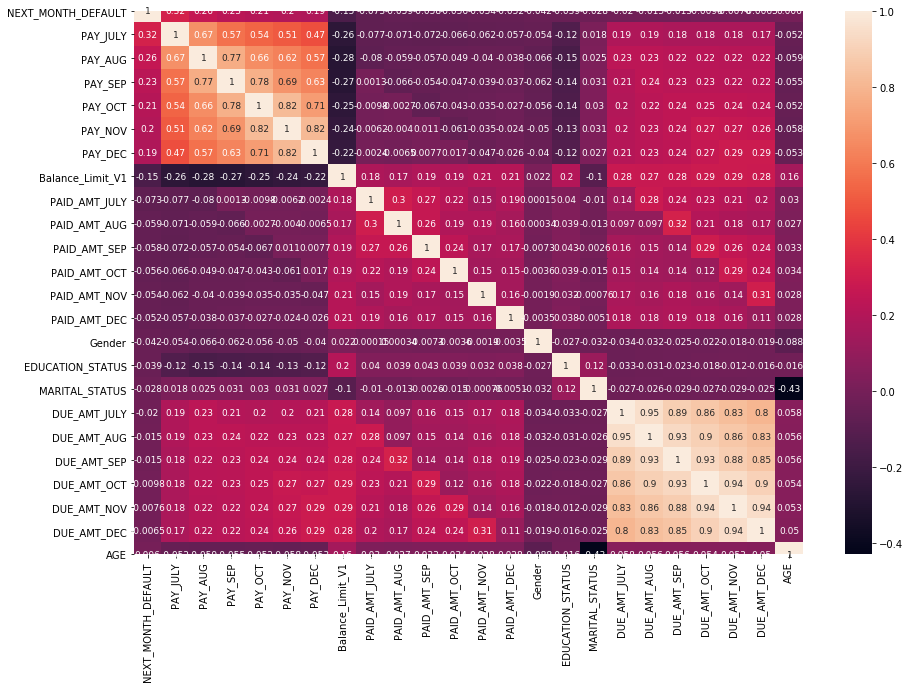

In [27]:
corrMatrix = data.corr()
cls=(abs(corrMatrix['NEXT_MONTH_DEFAULT']))
p=cls.sort_values(ascending=False)
index=p.index

from pandas import DataFrame
import seaborn as sn


df = DataFrame(data[index],columns=index)
                        
fig, ax = plt.subplots(figsize=(15,10),sharex=True, sharey=True) 
corrMatrix = df.corr()

sn.heatmap(corrMatrix, annot=True,annot_kws={"size": 9},ax=ax)